## 참고

* 비고
    * 1번 : '공부 필요' 태그 정리
    * 2번 : 2.3 커널 방법론부터
    * 3번 : 핀터레스트 추천 시스템 공부
    * 4번 : 2.2부터 공부

0. 우리에게 필요한거


1. [추천 시스템 알고리즘 트렌드 정리](http://hoondongkim.blogspot.com/2019/03/recommendation-trend.html)


2. [고객 온라인 구매후기를 활용한
추천시스템 개발 및 적용](https://web.yonsei.ac.kr/dslab/Journal/isr20151.pdf)


3. [당근 마켓 딥러닝 개인화 추천 정리](https://medium.com/daangn/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EA%B0%9C%EC%9D%B8%ED%99%94-%EC%B6%94%EC%B2%9C-1eda682c2e8c)


4. [딥 러닝 기반 최신 추천 시스템 동향 관련 Survey 논문](https://arxiv.org/pdf/1707.07435.pdf)


5. [유튜브 추천 시스템(Deep Neural Networks for YouTube Recommendations)](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/45530.pdf)


6. [구글 플레이 추천 시스템 Wide & Deep Model](https://leehyejin91.github.io/post-wide_n_deep/)


7. [카카오테크 - 멜론](https://tech.kakao.com/2020/04/29/kakaoarena-3rd-part1/)
    * [파트 2](https://tech.kakao.com/2020/04/29/kakaoarena-3rd-part2/)


8. [카카오테크 - 루빅스](https://tech.kakao.com/2016/04/27/rubics/)


9. [네이버 AiRS](https://www.slideshare.net/deview/airs-80886207)

### 0.

* 추천 시스템 도입으로 소비자 탐색 비용을 낮춰야 함


* 리뷰 분석을 통해 잘나가는 가게를 추려줄 수 있음


* 임대료, 위치, 업종, 휴무 날짜 등의 정보를 담은 query가 들어오면, 창업을 해서 성공을 할 수 있는 점수가 높은 ranking을 매김


* [ndcg(Normalized Discounted Cumulative Gain) 평가지표](https://walwalgabu.tistory.com/entry/4-NDCG-Normalized-Discounted-Cumulative-Gain%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C)
    * 랭킹 추천 분야에 많이 쓰이는 평가지표
    
    * Cumulative Gain(CG) : 사용자가 추천된 각 아이템을 얼마나 선호하는지 나타낸 관련성 점수(Relavance Score)를 합한값
        * cg = nΣi=1(relevance i)
    * DCG = 높은 순위(1위, 2위, ...)일수록 아이템을 잘 추천해주는게 낮은 순위의 아이템들을 잘 추천해주는 것보다 평가에 중요한 요소다
        * DCG는 모든 아이템에 적용되기 보다는 특정 Size=L개의 추천 리스트에서 계산됨
    
    * NDCG = DCG 값을 IDGC로 나눈 값
        * IDGC : Ideal DCG : L개의 결과를 rel이 큰 순서대로 정렬한 rel + opt에 대해서 DCG 해준 값
        
    * NDCG는 0 ~ 1 사이의 값을 가지며, 1과 가까울수록 우수한 추천 시스템

### 1.

0. 연관 분석 : 룰 기반의 모델로서, 상품과 상품사이에 어떤 연관이 있는지 찾음
    * [추천 시스템 이해](https://eda-ai-lab.tistory.com/522)
    * 연관의 정의
        1. 얼마나(frequent) 같이 구매가 되는가
        2. A 아이템을 구매하는 사람이 B 아이템을 구매하는가?
    * 장바구니 분석
    * 아이템의 수와 규칙의 수가 증가할 때 시간과 메모리를 너무 많이 차지함에 따라 Apriori 가 개발됨
    

1. A priori (연관 규칙 분석) : 대표적인 연관 상품 추천 알고리즘
    * [링크](https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/)
    * 어떤 두 아이템 집합이 번번히 발생하는가를 알려주는 일련의 규칙을 생성
    * 경영학의 장바구니 분석(Market Basket Analysis)
    * 컨텐츠 기반 추천(Contents-based recommendation)의 기본이 됨
    
    * 사용하는 용어 
        * 조건절(Antecedent), 결과절(Consequent), 아이템 집합(Item set)
        * 조건절과 결과절의 아이템 집합은 상호 배반(Mutually exclusive)여야 함
    
    * 좋은 규칙
        * 규칙의 효용성을 드러내주는 지표는 크게 지지도(Support)와 신뢰도(Confidence), 향상도(lift)가 있음
        * 지지도 : 조건절이 일어날 확률
        * 신뢰도 : 조건절이 주어졌을 때 결과절이 일어날 조건부 확률
        * 향상도 : 조건절과 결과절이 서로 독립일 때와 비교해 두 사건이 동시에 얼마나 발생하는지 비율로 나타내며 생성된 규칙이 실제 효용가치가 있는지 판별
        
    * 규칙을 만들 때 모든 조합을 만들면, 팩토리얼 시간 복잡도가 나오니 빈발 집합(Frequent item sets)만을 고려하여 연관 규칙을 생성하자는게 A priori algorithm
    
    * 핵심 아이디어
        * 아이템 집합 {A}의 지지도인 P(A) = 0.1
        * 아이템 집합 {A, B}의 지지도 P(A, B)는 P(A)보다 작거나 같음
        * 이 때 {A, B}는 {A}, {B}의 초월 집합(superset)이라고 부름
        
        * 임의의 아이템 집합의 지지도가 일정 기준을 넘지 못한다면, 해당 아이템 집합의 초월 집합의 지지도는 더 작을 것이기 때문에 유용하지 않을 수 있음.
            * 최소 지지도 요건을 만족못하는 곳은 계산하지말자
        * 각 아이템에 대해 최소 지지도 요건을 만족시키지 못하는 것은 제외해가며, 아이템 집합의 크기를 1씩 증가시켜가며 지지도를 분석
        * 더 이상 최소 지지도 이상을 나타내는 아이템 집합이 없을 때까지 아이템 집합의 크기를 1씩 증가시키면서 분석
    
    * 연관 규칙을 이용하면 문서 요약(document summarization)에도 적용 가능
        * 한 문장을 트랜잭션 데이터로 상정하고, 문장 내 단어를 아이템 집합으로 치환함
        * {발, 없는, 말이} -> {간다}
    

2. Collaboration Filterling (협업 필터링) : 
    * [링크](https://scvgoe.github.io/2017-02-01-%ED%98%91%EC%97%85-%ED%95%84%ED%84%B0%EB%A7%81-%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-(Collaborative-Filtering-Recommendation-System)/)
    * 특징
        * 손 쉬운 구현체 많음 : User base, Item base, Contents Base, ...
        * 많은 유저들로부터 모은 취향 정보들을 기반으로 한 예측 
        * 사람 A가 특정 이슈에 대해 B와 같은 의견을 갖는다면, 다른 이슈에 대해서도 비슷한 의견을 가질 확률이 높다는 사실에 기반
        * 협력 필터링 접근법의 근본적인 가정은 사용자들의 과거의 경향이 미래에서도 그대로 유지 될 것이라는 전제에 있다
    
    * 협업 필터링 방법론에는 Memory-based, Model-based, Hybrid가 있음. 
    
    * Memory-based
        * 유사도를 기반으로 동작
            * User-based (사용자 기반) : 사용자 - 사용자간 유사도 
            * Item-based (아이템 기반) : 아이템 - 아이템간 유사도
        * 다음은 사용자들이 영화 평점을 0-5 사이로 매긴 결과
        ```
        사람|영화    A    B    C    D    E
        가                 5    4     4     3
        나                 1    0     1           4
        다                 4    4            5    3
        라                       2     1     4    3
        마                 4           4     4    2
        바                 4    2     3           1
        ```
        * 사용자 기반 : 두 사용자가 얼마나 유사한 항목(아이템)을 선호했는가
            * 사용자의 항목 기반 벡터 표현이 가능. ex) 가 : (5, 4, 4, 3, -)
            * 이 때 두 사용자 간의 유사도는 두 벡터 간의 유사도로 정의 가능
                * 대개 코사인 유사도, 피어슨 유사도로 벡터 간의 유사도 구함
            * 두 사용자가 공통으로 평가한 항목에 대해서만 코사인 유사도를 계산.
                * '나'와 '라'의 유사도 검사
                    * '나' = (0, 1, 4), '라' = (2, 1, 3)
                    * similarity = 13 / (sqrt(17) * sqrt(14)) ~= 0.84
                * 모든 사용자에 대해서 유사도를 구하면 사용자 수 * 사용자 수(6*6) 크기의 유사도 행렬을 만들 수 있음
            
            * '마'의 'B'에 대한 평가 점수를 예측해보고 싶다면, 전체 사용자를 대상으로 예측 점수를 계산할 수도 있고, '마'와 가장 유사한 몇 명의 점수를 이용할 수도 있음. (예측 계산에는 weighted sum을 이용)
            * 다만, 코사인 유사도는 계산식 특성상 개인적인 평가 성향을 반영하지 못하기 때문에 피어슨 유사도나 보정 과정을 거친 코사인 유사도를 사용함.
            
            * 문제점 : 
                * 초기 평가자 문제 (First-rater Problem) : 어느 사람에게도 평가받지 못한 새로운 아이템 등장시 유사도 매트릭스 생성 불가
                * 콜드 스타트 문제 (Cold-start Problem) : 지금까지 한 번도 평가를 하지 않은 사용자때문에 발생하는 문제.
                
        * 아이템 기반 : 아이템들에 대한 유사도를 계산
                * 콜드 스타트 문제 존재
    
        * 사용자 기반 vs 아이템 기반
            * 아마존, 넷플릭스를 비롯한 서비스에서는 대부분 아이템 기반을 활용
            * 적절한 UX를 위해서라면, 유저가 아이템을 평가하는 순간 다른 아이템을 추천할 수 있어야 하는데, 매 평가시마다 유사도 정보를 업데이트하는 것은 현실적으로 어려움.
            * 아이템 기반은 일정 기간마다 유사도를 업데이트 하는 것으로 대처가 가능
            * 대부분 사용자에 비해 아이템 수가 적으니 아이템 간의 관계 데이터가 발생할 확률이 높고, 데이터가 누적될수록 추천의 정확도가 높아질 가능성이 더 높음
        
    * 협업 필터링 종류에는 두 가지가 있음 
        * 능동적 필터링 : P2P 방식(비슷한 관심사를 가진 사람을 기반)으로 상품 평가하고 웹에서 공유.
            * WWW에 기하급수적으로 증가하는 정보의 양에 비해 가치있는 정보의 검색 효율성이 떨어지고 있기 때문에 유용한 알고리즘
            * 유도 웹 검색 기반이 없는 경우 가장 중요하고 효율적
            
        * 수동적 필터링 : 모든 사람이 자동적으로 주어진 데이터를 가지고 직접 접근하며 평가
    * [scaling up implict matrix factorization with hadoop](https://www.slideshare.net/MrChrisJohnson/collaborative-filtering-with-spark)
        * p.16부터
        

3. FPGroth : A Priori의 속도 단점 개선
    * Spark ML 라이브러리에 구현되어 있으며, Apriori의 BigData 버전
    * 대용량 Data를 통한 커버리지 개선 및 최신성이 개선되어 ABTest Score를 향상시키는 것이 가능해짐
    
    * FP Tree 구조를 사용해서 비슷한 성능에 더 빠른 속도
    * Apriori에서는 confidence 방식으로 아이템간의 연관성을 찾을 수 있었지만, FP-Growth에서는 아이템 간의 연관성 찾기가 어려움
    * FP 트리가 만들어지면(트라이랑 비슷) 분해 과정을 통해 아이템별 conditional pattern bases를 만듦
    * conditional pattern bases를 기반으로 조건절과 결과절 패턴 생성
    
    
4. [Collaboration Filltering + Deep Learning(혹은 유사 Approach)](https://www.whydsp.org/291)
    * 크게 성공한 방식은 별로 없음 
    * RBM for CF (볼프만 머신을 이용한 협업 필터링)
        * [RBM (Restricted Boltzmann Machine, 제한된 볼프만 머신)](https://tbacking.com/2016/12/10/rbm-%EC%A0%9C%ED%95%9C%EB%90%9C-%EB%B3%BC%EC%B8%A0%EB%A7%8C-%EB%A8%B8%EC%8B%A0-%EC%9D%B4%ED%95%B4/)
            * 심층신뢰신경망을 구성하는 기본적 요소 (RBM을 여러겹 쌓아 DBN을 만듦)
            * 가시층(Visible layer)과 은닉층(Hidden layer)으로만 구성됨
            * 제한 : 같은 층 내부 노드간 연결은 없고 층과 층 사이의 연결만 있음
            * 역전파와 비슷하게 입력노드에 가중치를 곱한 다음 시그노이드 함수를 적용해 은닉층의 값을 구하지만, RBM은 확률적으로 샘플링해서 구함
            * 미지의 세계를 모델링하기위해 확률 도입
            * 역전파의 오류치 계산과 비슷하게 에너지라는 개념이 있음
    * 가시층을 아이템으로, 히든층을 파라미터로 설정
    * 위 링크의 'RBM for Recommendations' 부분 사진을 보면 vi가 rated되고 다시 학습되며 값이 재설정되는 것을 확인할 수 있음
   
    
5. 많이 쓰이는 협업 필터링 기반 추천 시스템 (Matrix Factorization, 행렬 분해)
    * 넷플리스 추천 대회에서 가장 우수한 알고리즘으로 알려지며 유명세를 탐
    * 협업 필터링은 KNN, SGD, ALS를 응용해 구현할 수 있으며, KNN은 Neighborhood model 기반이라면, SGD와 ALS는 Latent Model 기반
        * 잠재 요인 협업 필터링은 Rating Matrix에서 빈 공간을 채우기 위해 사용자와 상품을 잘 표현하는 잠재 요소(Latent Factor) 차원을 찾는 방법
        * 사용자와 아이템의 잠재 요인을 내적해서 평점 매트릭스를 계산
    
    * [SGD](https://eda-ai-lab.tistory.com/528)
        * User Latent, Item Latent 두 개의 행렬을 동시에 최적화 하는 방법
        * 공부 필요
    
    * [ALS](https://eda-ai-lab.tistory.com/529)
        * 두 행렬 중 하나를 고정시키고 다른 하나의 행렬을 순차적으로 반복하면서 최적화
            * 기존 최적화 문제가 convex 형태로 바뀌기에 수렴된 행렬을 찾을 수 있는 장점이 있음
        * 공부 필요
        
        
6. Item2Vec + CF
    * Doc2Vec, User2Vec, Item2Vec 등을 CF에 결합하면 Un Seen Feature에 대하여 좀 더 강건해짐
    

7. 유튜브 추천 스타일의 딥러닝 approach


8. [Wide & Deep Model](https://leehyejin91.github.io/post-wide_n_deep/)
    * 구글 플레이 스토어의 추천에 사용되면서 높은 효율 개선 이력을 보인 알고리즘으로 유명세를 탐
    * 추천이 아닌 예측 문제에서도 유용 
    * 앱 추천 시스템의 대략적인 동작 원리 : user의 검색 query가 들어오면, db로부터 해당 query에 적합한 후보 앱들을 retrieval.
        * 이어, 랭킹 알고리즘을 통해 후보 앱들의 점수를 메겨 정렬함.
        * 점수는 user 정보 x가 주어졌을 때, user가 y앱에 action할 확률인 p(y|x)를 구하는 것.
        * ranking 알고리즘을 통해 후보 앱들의 점수를 메기는데 사용하는 알고리즘
        
    * wide 모델에서는 학습할 입력에 대해 cross-product를 통해 interaction을 표현
        * user의 취향이 반영된 niche combination 학습 가능
        
    * deep 모델에서는 앱에 대해 동일한 임베딩 공간에 표현
        * pair가 없는 관계도 학습 가능
        * generalization에 강하지만 희소한 앱들은 학습이 잘 안됨(전혀 관계 없는 아이템이 추천될 수 있음)
    
    
9. Factorization Machine
    * 공부 필요
    
    * Matrix Factorization과 Factorization Machine 차이점
        * 공부 필요


10. 최근 개인화 추천
    * 2017 aws re-invent
        * 딥 러닝 베이스 개인화 추천 알고리즘
        * 유튜브 추천과 유사. 다양한 Feature의 Embedding Vector를 Concat하여 Neurual Network에 넣었음
    
    * 2018 aws re-invent 
        * [Hierachical RNN](https://arxiv.org/pdf/1803.00710.pdf)
        * 공부 필요
    
    * re-ranking
        * 개인화 reinforcement learning re-ranking by 알리바바
        * 개인화 re-ranking에 강화 학습 이용
        * FM과 마찬가지로 기존 Legacy  추천 시스템 뒤에서, 혹은 복수 개의 모델의 개인화 노출 순서를 정하는 부분, 혹은 Search 엔진 뒤에서 개인화를 구현하는 데 적합

### 2. 

* 토픽 모델링 (Topic Modeling) : 
    * [링크 1](http://bigdata.emforce.co.kr/index.php/2020072401/)
    * [링크 2](https://wikidocs.net/30708)
    * 각 단어나 문서들의 집합에 대해 숨겨진 주제를 찾아내어 문서나 키워드별로 주제끼리 묶어주는 비지도학습 알고리즘
        * 기사 문서에 담긴 텍스트들의 키워드를 하나씩 뽑아 키워드를 토픽별로 인덱싱하여 분류
    * LDA (Latent Dirichlet Allocation, 잠재 디리클레 할당) : 단어나 문서의 숨겨진 주제를 찾아내주는 토픽 모델링 기법
        * 주제(Topic) : 수집된 원문 내용에 담긴 키워드를 기반으로 내용을 그룹화 시키는 것
        * 문서가 있고, 그 안에 단어가 있다면 확률분포 중 하나인 디리클레의 분포를 가정하고 번호가 매겨진 토픽 안에 문서와 단어들을 하나씩 넣어보며 잠재적인 의미(토픽)를 찾는 과정
        * 간단한 모델링 과정 예시
            * [BoW, DTM, TF-IDF](http://hleecaster.com/nlp-bag-of-words-concept/)
            1. 모든 문서의 문서 속 단어들을 추출해 임의의 토픽 번호를 부여 (DTM 또는TF-IDF)
                * LDA는 '나는 이 문서를 작성하기 위해서 이런 주제들을 넣을거고, 이런 주제들을 위해서는 이런 단어들을 넣을 거야' 라는 가정을 함.
                * 문서에 사용할 토픽의 개수 k를 정하고, 토픽의 혼합을 확률 분포에 기반하여 결정
            2. 토픽 - 문서간의 단어 분포도 계산
                * 이때 LDA 하이퍼 파라미터 값인 α를 0이 아닌 최소한의 값으로 정해서 더함
                * 추후 토픽에 단어, 문서가 존재할 확률을 구할 때 0이 나오는 것을 방지하기 위함
            3. 토픽 - 단어 분포 계산
                * 이때 LDA 하이퍼 파라미터 값인 β를 최소한의 값을 부여
            4. 모든 문서의 모든 단어에 대해서 아래의 사항을 iterative하게 진행
                * 어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정함.
                    * 이에 따라 단어 w는 아래의 두 가지 기준에 따라 토픽이 재할당됨
                    * p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
                    * p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포
                * 이를 반복하면, 모든 할당이 완료된 수렴 상태가 됨


* BestBuy 사례 : 
    * 오프라인 매장을 비용이 발생하는 공간이 아닌 고객경험창출과 효율적인 배송 서비스를 제공할 수 있는 옴니채널 전략으로 정의
    * shop in shop : 매장에 삼성, 애플, 소니와 같은 테크 기업들의 쇼룸으로 변화시켜 방문 고객들은 테크 기업들이 제공하는 최신의, 최고의 경험을 즐길 수 있으며, 기업들이 쇼룸을 꾸미고 설명 요원까지 파견함
    
    
* 본 논문에선 구매 후기 토픽 모델링을 통해 구매자 별 리뷰 작성 특성을 파악
    * 빠른 학습 속도와 비교적 높은 정확성의 패턴 인식 방법인 surport vector regression을 다중 커널 학습(Multiple Kernel Learning)으로 확장
    * 분석 결과를 기반으로 회귀 분석을 시행해서 사용자 별 제품에 대한 평가 점수를 예측

### 3. 

* 딥러닝 추천 시스템
    * 유튜브, 핀터레스트의 추천 시스템 공통점은 2단계로 나눠있다는 점
    * 1단계 후보 모델 : 사용자에게 추천할 후보군을 선정
    * 2단계 랭킹 모델 : 관심 점수 계산
    
    * 초기 모델은 최근 본 글에 대해(Input) 다음 본 글(Target)을 추론하는 확률을 높임
        * Language model의 학습 기법처럼 negative sampling과 binary cross entropy loss를 사용해서 학습
        
    * 예측할 때는 한 사용자 벡터와 전체 글을 모두 연산해야하기 때문에 오래 걸림
    
    * 성능 측정을 위해 Mean Average Precision(MAP)과 TOP 50을 사용
    
    * 후보 모델 이후 랭킹 모델 개발
        * 사용자 정보와 글 정보 등을 모두 concat하여 학습
        * 최종 결과는 Neural network layer에서 나와 더 정확하게 선호도를 예측할 수 있고, 값의 정도를 나타내는 regression 모델로 볼 수 있음


* 당근 마켓은 지역 한정으로 글 조회가 가능하지만, 지역간 볼 수 있는 범위가 겹치는 부분도 많고 조회할 수 있는 지역을 번갈아 볼 수 있어서 전체 지역을 대상으로 학습
    * 대신 학습시 지역 정보를 주어 조건부 확률을 학습하도록 함


* 유튜브와 비슷하게 당마도 최신 글 소비가 매우 높음
    * 인기 있는 글은 시간이 지남에 따라 이미 예약중이거나 거래완료가 됐을 확률이 큼

            
* [핀터레스트 추천 시스템](https://www.youtube.com/watch?v=hN995d7g4us)

### 4.

* 크게 세 가지의 추천 시스템 모델 : 협업 필터링, 콘텐츠 기반, 하이브리드

* 최근 추천 시스템에 딥러닝 많이 적용하는 중

* Deep learning is able to effectively capture the non-linear and non-trivial user-item relationships

* Covington et al. [27] presented a deep neural network based recommendation algorithm for video recommendation on YouTube. 
* Cheng et al. [20] proposed an App recommender system for Google Play with a wide & deep model.
* Shumpei et al. [113] presented a RNN based news recommender system for Yahoo News. 


* 

### 5.
* [유튜브 추천 시스템(Deep Neural Networks for YouTube Recommendations)](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/45530.pdf)
    * exploration : gather more information 
    * exploitation : make the best decision given current information
    * 유튜브 추천 알고리즘은 다음의 세 주요 이슈가 있음
        1. Scale : 
        2. Freshness : 리뷰 분석할 때 참고
        3. Noise : 사용자 과거 행동 분석이 어렵고 다양한 노이즈가 있음. content와 관련된 메타데이터가 잘 정의된 온톨로지가 없어서 정의가 어려움.
    
    
* SYSTEM OVERVIEW
    * The system is comprised of two neural networks: one for candidate generation and one for ranking
        * candidate generation network :  
            * takes events from the user’s YouTube activity history as input and retrieves a small subset (hundreds) of videos from a large corpus.
            * The candidate generation network only provides 광범위한 개인화 collaborative filtering 통해서
            * The similarity between users is expressed in terms of coarse features such as IDs of video watches, search query tokens and 인구통계
            * 다음에 시청할 비디오 예측

        * ranking network : 
                * 비디오와 사용자를 설명하는 set를 이용해 비디오에 점수를 매겨
                * The highest scoring videos are presented to the user, ranked by their score
                * 사용자의 비디오 시청 시간 예측

    * make extensive use of offline metrics (precision, recall, ranking loss, etc.) to guide iterative improvements to our system. 
    * rely on A/B testing via live experiments
        *  we can measure subtle changes in click-through rate, watch time, and many other metrics that measure user engagement
        
    * 구글 딥 러닝 인공지능 Brain의 알고리즘과 심층 신경망 (Deep neural network, DNN) 모델 사용
    * 2012년. 비디오 클릭 수 대신 비디오 시청 시간 기반으로 동영상을 추천하기 시작
    * 2015년. Google Brain의 딥러닝을 통해서는 유저와 비디오의 관계를 다각도에서 분석, 유저와 다양한 관련성을 가진 비디오를 빠르고 정확하게 추천


* Candidate Generation : 사용자가 시청할 다음 비디오는?
   * Early iterations of our neural network model mimicked matrix factorization behavior with shallow networks that **only embedded the user’s previous watches**.
       * 모든 유저 정보는 벡터로 “embedding” (숫자화) 되어 심층 신경망에 입력

   * Recommendation as Classification 
       * the prediction problem becomes accurately classifying a specific video watch wt at time t among millions of videos i (classes) from a corpus V based on a user U and context C
       * where u ∈ R^N represents a high-dimensional “embedding” of the user, context pair and the vj ∈ R^N represent embeddings of each candidate video.
           * In this setting, an embedding is simply a mapping of sparse entities (individual videos, users etc.) into a dense vector in R^N
       * 딥 러닝은 learn user embeddings u as a function of the user’s history and context. 비디오 구별하기에 의미있는 것으로. with a softmax classifier
           * Softmax 다중 분류 함수를 활용해 분류된 비디오 각각의 시청확률 분석. 시청 확률이 높은 비디오 선별
       * 좋아요나 설문 같은 명확한 피드백이 있지만, (잘 이해가 안감) 시청의 긍정적인 기록 같은 불분명한 정보도 사용함
           * based on the orders of magnitude more implicit user history available, allowing us to produce recommendations deep in the tail where explicit feedback is extremely sparse.

    * Search history is treated similarly to watch history 
    * A key advantage of using deep neural networks as a generalization of matrix factorization 임의의 연속된 카테고리 피쳐들이 모델에 쉽게 더해짐
        
    * 시청한 비디오 ID, 검색어, 사용자 정보 (위치, 나이, 성별 등) 등 유저의 활동 내역과 유저가 비디오를 시청한 문맥 배우기
        * The user’s geographic region and device are embedded and concatenated. Simple binary and continuous features such as the user’s gender, logged-in state and age are input directly into the network as real values normalized to [0, 1].
    * 
        
        
* RANKING : 사용자가 추천 표시된 비디오를 얼마나 오래 시청할 것인가? 


* 첫 번째 레이어에 다양한 정보를 입력, 연결. 그 위에 수 겹의 히든 레이어 Rectiﬁed Linear Units (ReLU)를 연결. 
    * 레이어들이 연결되면서 직관적이지 않은 수 많은 데이터들 간의 관계가 연산됨. 
    * 데이터와 히든 레이어를 추가할수록 (레이어 depth가 증가할수록) 모델의 정확도 증가. 방대한 데이터와 그 사이의 상호작용을 반영하여 시청 확률이 높은 비디오 추천. 




* 참고
    * [Youtube 추천 시스템 분석](https://havefunlearningnewstuff.tistory.com/3)
    * [논문 요약](http://keunwoochoi.blogspot.com/2016/09/deep-neural-networks-for-youtube.html)
    

### 6. 
* [Wide & Deep Model](https://leehyejin91.github.io/post-wide_n_deep/)
    * 구글 플레이 스토어의 추천에 사용되면서 높은 효율 개선 이력을 보인 알고리즘으로 유명세를 탐
    * 추천이 아닌 예측 문제에서도 유용 
    * 앱 추천 시스템의 대략적인 동작 원리 : user의 검색 query가 들어오면, db로부터 해당 query에 적합한 후보 앱들을 retrieval.
        * 이어, 랭킹 알고리즘을 통해 후보 앱들의 점수를 메겨 정렬함.
        * 점수는 user 정보 x가 주어졌을 때, user가 y앱에 action할 확률인 p(y|x)를 구하는 것.
        * ranking 알고리즘을 통해 후보 앱들의 점수를 메기는데 사용하는 알고리즘
        
    * wide 모델에서는 학습할 입력에 대해 cross-product를 통해 interaction을 표현
        * user의 취향이 반영된 niche combination 학습 가능
        
    * deep 모델에서는 앱에 대해 동일한 임베딩 공간에 표현
        * pair가 없는 관계도 학습 가능
        * generalization에 강하지만 희소한 앱들은 학습이 잘 안됨(전혀 관계 없는 아이템이 추천될 수 있음)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state = 156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)
dt_clf.fit(X_train, y_train)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file = "tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

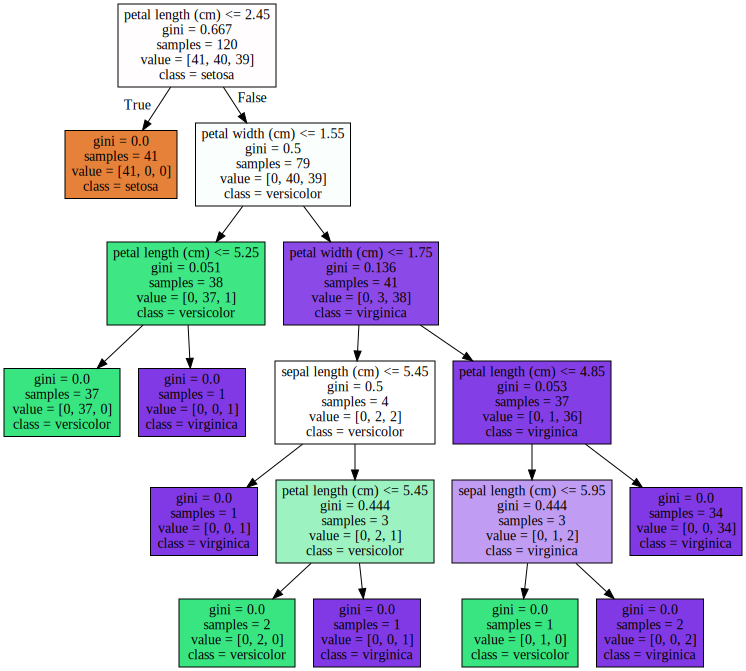

In [3]:
import graphviz
with open("tree.dot") as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)